In [1]:
# tensorflow version1을 가져오고 version2의 행동방식을 잠시 꺼두는 코드
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
import numpy as np
import pandas as pd

## Building a Tensorflow Graph

In [3]:
# not 8 -> tensorflow 2버전(8)과 1버전(not 8)의 차이!
# scaler라서 shape=() , build만 한 상태!
a = tf.add(3,5)
print(a)

Tensor("Add:0", shape=(), dtype=int32)


In [4]:
a = tf.add(3,5, name='a') # name='a'를 사용하여 내부 변수 이름을 직접 지정해줌
print(a)

Tensor("a:0", shape=(), dtype=int32)


## Executing the Tensorflow Graph

In [5]:
a = tf.add(3,5)
sess = tf.Session() # 계산 그래프를 실행시켜주는 코드
print(sess.run(a))

8


2022-06-28 09:23:46.335950: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [6]:
# Session계산 후 close로 닫아줘야 함
# cf. python 파일 IO의 open, close -> with open
sess.close()

In [ ]:
a = tf.add(3,5)
with tf.Session() as sess : # with문이 끝남과 동시에 sess 날라감
    print(sess.run(a))

In [9]:
x = 2
y = 3
op1 = tf.add(x,y)
op2 = tf.multiply(x,y)
op3 = tf.pow(op2, op1)

In [8]:
with tf.Session() as sess:
    op3 = sess.run(op3)
    print(op3)

# op1, op2는 run을 하지 않았는데 실행이 됨, op3의 tensor와 직계로 연결된 것은 run이 실행이 됨

7776


In [30]:
x = 2
y = 3
op1 = tf.add(x,y)
op2 = tf.multiply(x,y)
useless = tf.multiply(x, op1) 
op3 = tf.pow(op2, op1)

In [31]:
with tf.Session() as sess:
    op3 = sess.run(op3)
    print(op3)
    
# useless는 op3와 직계로 연결되지 않았기 때문에 tensorflow가 무시해버림 -> tensorflow의 장점

7776


In [35]:
# 여러 개의 tensor를 동시에 실행하고 싶을 경우에는 list로 전달
# with tf.Session() as sess:
#     op3, useless = sess.run([op3, useless]) 
#     print(op3, useless)

# TensorFlow basic - Linear Regression

## 1. Prepare the data
- Practice for Gradient Descent using Boston Housing data

In [17]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [19]:
x_data = datasets.load_boston().data[:, 12] # 주변 이웃 중 하위 계층의 비율
y_data = datasets.load_boston().target # 집의 가격
# x_data, y_data 둘다 numpy array
df = pd.DataFrame([x_data, y_data]).transpose()
df.head()

/opt/homebrew/Caskroom/miniforge/base/envs/dl/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include th

,0,1
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


## 2. Build the model
- tf.Variable(초기화 방법)

In [23]:
# w, b : parameter 세타

# 세타를 랜덤한 값으로 초기화, random_normal에서 normal은 분포(정규분포)
# 1개의 값을 정규분포의 값에서 랜덤하게 꺼내줌, (2,3)행렬 값 6개도 랜덤하게 꺼내줌
w = tf.Variable(tf.random_normal([1])) 
b = tf.Variable(tf.random_normal([1]))

y_predicted = w * x_data + b # model

# tf.add(), tf.multiply()..로 하는 것이 좀 더 좋음

## 3. Set the criterion : cost function & Gradient Descent method
- 설정
    - cost function
    - Gradient Descent method
    - learning rate

In [27]:
loss = tf.reduce_mean(tf.square(y_predicted - y_data)) # MSE

# full batch normal Gradient Descent(vanilla gradient descent)
optimizer = tf.train.GradientDescentOptimizer(0.001) # learning rate = 0.001

train = optimizer.minimize(loss) # MSE를 minimize하게

## 4. Train the model

In [28]:
with tf.Session() as sess :
    sess.run(tf.global_variables_initializer()) # 객체를 만들어 줌, tf.Variables 초기화
    
    for step in range(10000) : # epoch, iteration
        sess.run(train) # 실제로 Gradient Descent가 실행되는 코드, 학습 진행
        if step % 1000 == 0 :
            print('Step {}: w {} b {}'.format(step, sess.run(w), sess.run(b))) # sess.run은 학습 진행 X
            print('loss {}'.format(sess.run(loss)))
            print()
    w_out, b_out = sess.run([w, b])

Step 0: w [0.84947765] b [-1.5010242]
loss 379.7929382324219

Step 1000: w [0.3875002] b [12.275169]
loss 158.2057342529297

Step 2000: w [-0.12306242] b [20.77927]
loss 84.25015258789062

Step 3000: w [-0.4387369] b [26.037249]
loss 55.978607177734375

Step 4000: w [-0.6339119] b [29.28815]
loss 45.17115783691406

Step 5000: w [-0.7545861] b [31.29814]
loss 41.039710998535156

Step 6000: w [-0.82919663] b [32.54088]
loss 39.46036148071289

Step 7000: w [-0.8753276] b [33.30925]
loss 38.856605529785156

Step 8000: w [-0.9038493] b [33.784317]
loss 38.62580108642578

Step 9000: w [-0.9214841] b [34.07805]
loss 38.537574768066406



## 5. Visualize the result

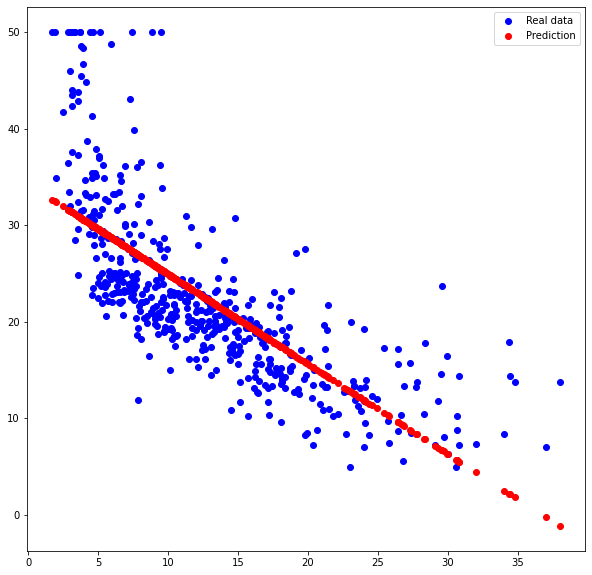

In [34]:
plt.figure(figsize=(10,10))
plt.plot(x_data, y_data, 'bo', label='Real data') # blue 'o' marker
plt.plot(x_data, x_data * w_out + b_out, 'ro', label ='Prediction') # red 'o' marker
plt.legend()
plt.show()

# 비선형 모델이 예측을 더 잘할 것으로 보임

## 비선형 모델

## 1. Prepare the data
- Practice for Gradient Descent using Boston Housing data

In [36]:
x_data = datasets.load_boston().data[:, 12] # 주변 이웃 중 하위 계층의 비율
y_data = datasets.load_boston().target # 집의 가격
# x_data, y_data 둘다 numpy array
df = pd.DataFrame([x_data, y_data]).transpose()
df.head()

/opt/homebrew/Caskroom/miniforge/base/envs/dl/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include th

,0,1
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


In [38]:
x_data.shape, y_data.shape

((506,), (506,))

## 2. Build the model
- 2 Hidden layers

In [47]:
# 2차원 이상의 행렬이 들어가야 함
_x_data = tf.reshape(x_data, [len(x_data), 1]) # reshappe의 -1 : 알아서 처리해라 / (506, 1)
_y_data = tf.reshape(y_data, [len(y_data), 1])

W1 = tf.Variable(tf.random_normal([1, 5], dtype = tf.float64))
W2 = tf.Variable(tf.random_normal([5, 10], dtype = tf.float64))
W_out = tf.Variable(tf.random_normal([10, 1], dtype = tf.float64))

hidden1 = tf.nn.elu(tf.matmul(_x_data, W1)) # matrix multi : 행렬곱, 선형 결합
hidden2 = tf.nn.elu(tf.matmul(hidden1, W2))
output = tf.matmul(hidden2, W_out) # matrix multi : 행렬곱

## 3. Set the criterion : cost function & Gradient Descent method

In [49]:
# loss = tf.reduce_mean(tf.square(output - _y_data)) # MSE
loss = tf.losses.mean_squared_error(output, _y_data)

# full batch normal Gradient Descent(vanilla gradient descent)
optimizer = tf.train.AdamOptimizer(0.001) # Adam Optimizer / learning rate = 0.001

train = optimizer.minimize(loss) # MSE를 minimize하게

## 4. Train the model

In [50]:
with tf.Session() as sess :
    sess.run(tf.global_variables_initializer()) # 객체를 만들어 줌, tf.Variables 초기화
    
    for step in range(50000) : # epoch, iteration
        sess.run(train) # 실제로 Gradient Descent가 실행되는 코드, 학습 진행
        if step % 5000 == 0 :
            print('Step {} || loss : {}'.format(step, sess.run(loss))) # sess.run은 학습 진행 X
            print()
    output = sess.run(output)

Step 0 || loss : 7036.939453125

Step 5000 || loss : 30.932701110839844

Step 10000 || loss : 26.2939510345459

Step 15000 || loss : 26.16997718811035

Step 20000 || loss : 26.166584014892578

Step 25000 || loss : 26.177854537963867

Step 30000 || loss : 26.1618595123291

Step 35000 || loss : 26.152488708496094

Step 40000 || loss : 26.147321701049805

Step 45000 || loss : 26.14401626586914



## 5. Visualize the result

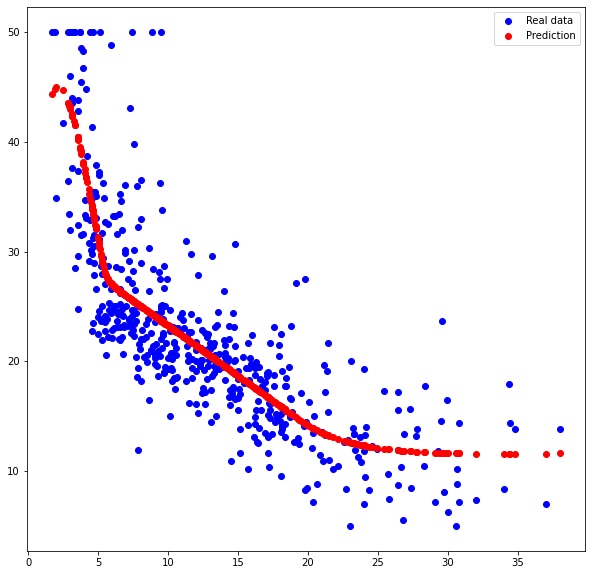

In [51]:
plt.figure(figsize=(10,10))
plt.plot(x_data, y_data, 'bo', label='Real data') # blue 'o' marker
plt.plot(x_data, output, 'ro', label ='Prediction') # red 'o' marker
plt.legend()
plt.show()

### Why?
- y_data의 차원이 (506,1)이 아니라 (506,)임!
- _y\_data = tf.reshape(y_data, [len(y_data), 1])

### Try other improvements
- Other activation functions (tanh, relu)
- Other optimizers (Adam, Adagrad, RMSProp)
- Other learning rates (0.01, 0.0001)
- More learning steps (75000, 1000000)
- More layers & nodes (64, 128, 256)

run돌리는 시점에 train시점과 test시점에 다른 값이 들어가야 함 -> placeholder